# PowerGAMA
## Europe 2014 model example
This is an example of PowerGAMA using the openly available 2014 Europe dataset by Rye et al., available from
http://dx.doi.org/10.5281/zenodo.54580. This dataset is also included with the source code in the "examples" folder

### Part 1: Data input and simulation


In [1]:
# The next line is to ensure inline plots in this notebook
%matplotlib inline

import powergama
print("Version = {}, ({})".format(powergama.__version__,powergama.__version_date__))

Version = 1.1.1, (2017-07-10)


Define some parameters:
* timerange = range to include in present simulation (refering to rows in the time-series input files) to include in the . In this case, a short range of 24 hours is used
* datapath = path to input files
* sqlfile = name of sqlite3 file storing all results

In [2]:
timerange = range(0,24)
datapath= "data_europe2014/"
sqlfile = "results_db_europe2014.sqlite3"

In [3]:
data = powergama.GridData()
data.readGridData(nodes=datapath +  "2014_nodes.csv",
                  ac_branches=datapath +  "2014_branches.csv",
                  dc_branches=datapath +  "2014_hvdc.csv",
                  generators=datapath + "2014_generators.csv",
                  consumers=datapath + "2014_consumers.csv")
data.readProfileData(filename=datapath+"profiles.csv",
            storagevalue_filling=datapath+"profiles_storval_filling.csv",
            storagevalue_time=datapath+"profiles_storval_time.csv",
            timerange=timerange, 
            timedelta=1.0)

Now, solve the problem
This may take some time.

In [5]:
lp = powergama.LpProblem(data)
res = powergama.Results(data,sqlfile,replace=True)
lp.solve(res)

Computing B and DA matrices...
Creating B and DA coefficients...
Found synchronous area (size = 1530), using ref node = E-174
Found synchronous area (size = 1), using ref node = SE-Starno
Found synchronous area (size = 1), using ref node = GB-Sellindge
Found synchronous area (size = 2), using ref node = SE-Soderasen
Found synchronous area (size = 1), using ref node = NO-Feda
Found synchronous area (size = 1), using ref node = NO-Kristiansand
Found synchronous area (size = 1), using ref node = GB-Isle of Grain
Found synchronous area (size = 1), using ref node = SE-Lindome
Found synchronous area (size = 1), using ref node = SE-Kruseberg
Creating LP problem instance...
Initialising LP problem...
Replacing existing SQLite file "C:\Users\hsven\Documents\python\powergama\powergama\examples\results_db_europe2014.sqlite3"
:) Found solver here: C:\Users\hsven\Documents\bin\cbc.exe
Solving...
4% 8% 12% 16% 20% 25% 29% 33% 37% 41% 45% 50% 54% 58% 62% 66% 70% 75% 79% 83% 87% 91% 95% 100% 

### Part 2: Analyse results
Plot some results
These plots are examples, more plots and methods to analyse results are available

Getting energy output from all generators...


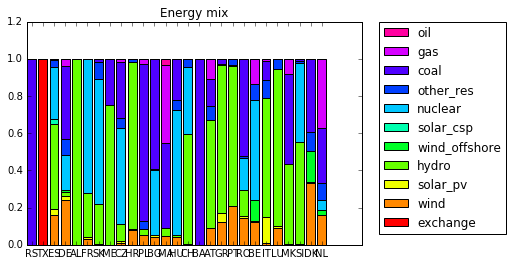

In [6]:
res.plotEnergyMix(relative=True)

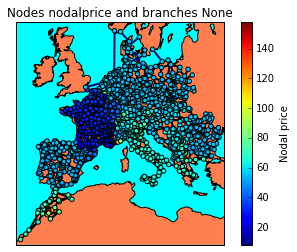

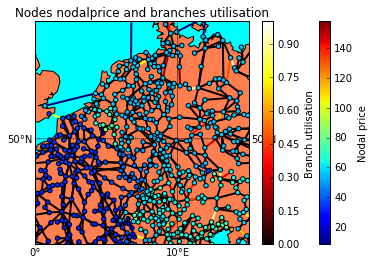

In [7]:
res.plotMapGrid(nodetype='nodalprice',dotsize=20)
res.plotMapGrid(nodetype='nodalprice',branchtype='utilisation',dotsize=20,latlon=[45,0,55,15],draw_par_mer=True)

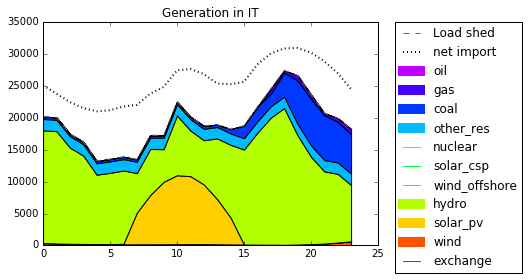

In [8]:
res.plotGenerationPerArea(area='IT')

Generator with storage:

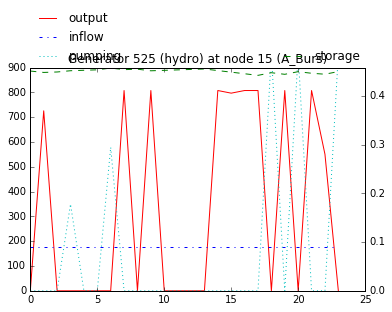

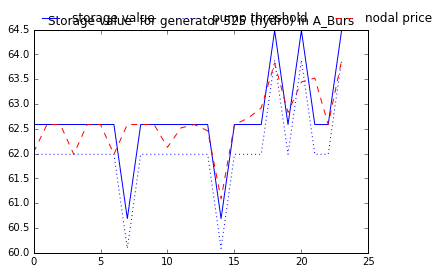

In [13]:
the_generator = 525
res.plotGeneratorOutput(the_generator)
res.plotStorageValues(the_generator)

In [16]:
#res.plotTimeseriesColour(areas=['DE','FR','IT'],value='nodalprice')